## Exploring 2016 US Presidential Election Results and associated demographic data

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
pd.options.display.max_columns = 100

### Importing Data

In [4]:
file_results = "US_County_Level_Presidential_Results_08-16.csv"
file_demo = "data.csv"

In [5]:
df_results = pd.read_csv(file_results)
df_demo = pd.read_csv(file_demo)

In [6]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 7 columns):
fips_code    9336 non-null int64
county       9336 non-null object
Year         9336 non-null int64
total        9336 non-null int64
dem          9336 non-null int64
gop          9336 non-null int64
oth          9336 non-null int64
dtypes: int64(6), object(1)
memory usage: 510.6+ KB


In [7]:
df_results.head(5)

,fips_code,county,Year,total,dem,gop,oth
0,1001,Autauga County,2008,23641,6093,17403,145
1,1001,Autauga County,2012,23909,6354,17366,189
2,1001,Autauga County,2016,24661,5908,18110,643
3,1003,Baldwin County,2008,81413,19386,61271,756
4,1003,Baldwin County,2012,84988,18329,65772,887


#### only looking at 2016 results

In [8]:
df_results_2016 = df_results[df_results['Year']==2016]

In [9]:
df_results_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 2 to 9335
Data columns (total 7 columns):
fips_code    3112 non-null int64
county       3112 non-null object
Year         3112 non-null int64
total        3112 non-null int64
dem          3112 non-null int64
gop          3112 non-null int64
oth          3112 non-null int64
dtypes: int64(6), object(1)
memory usage: 194.5+ KB


In [10]:
df_results_2016.head()

,fips_code,county,Year,total,dem,gop,oth
2,1001,Autauga County,2016,24661,5908,18110,643
5,1003,Baldwin County,2016,94090,18409,72780,2901
8,1005,Barbour County,2016,10390,4848,5431,111
11,1007,Bibb County,2016,8748,1874,6733,141
14,1009,Blount County,2016,25384,2150,22808,426


In [11]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 38 columns):
State                                3111 non-null object
FIPS                                 3111 non-null int64
County                               3111 non-null object
election_result                      3111 non-null object
% Some College                       3111 non-null float64
% Smokers                            3111 non-null int64
% Single-Parent Households           3111 non-null int64
% Severe Housing Problems            3111 non-null int64
% Receiving HbA1c                    3078 non-null float64
% Physically Inactive                3111 non-null int64
% Obese                              3111 non-null int64
% Long Commute - Drives Alone        3111 non-null int64
% LBW                                3022 non-null float64
% Fair/Poor                          3111 non-null int64
% Excessive Drinking                 3111 non-null int64
% Drive Alone - White        

In [12]:
df_demo.head(5)

,State,FIPS,County,election_result,% Some College,% Smokers,% Single-Parent Households,% Severe Housing Problems,% Receiving HbA1c,% Physically Inactive,% Obese,% Long Commute - Drives Alone,% LBW,% Fair/Poor,% Excessive Drinking,% Drive Alone - White,% Drive Alone - Hispanic,% Drive Alone - Black,% Drive Alone,% Children in Poverty - White,% Children in Poverty - Hispanic,% Children in Poverty - Black,% Children in Poverty,% Alcohol-Impaired,% Mammography,Graduation Rate,Income Ratio,Mentally Unhealthy Days,Physically Unhealthy Days,Preventable Hosp. Rate,Teen Birth Rate,Violent Crime Rate,Years of Potential Life Lost Rate,Chlamydia Rate,Association Rate,% unemployment,% Uninsured,% With Access
0,Alabama,1001,Autauga,Trump,59.7,17,25,15,84.0,29,34,43,9.0,18,15,83.0,NaN,NaN,87,11.0,NaN,43.0,19,33.0,62.7,90.0,4.3,4.2,4.2,59.0,32.0,266.0,9158.0,398.0,13.7,0.052712,11,71.0
1,Alabama,1003,Baldwin,Trump,62.9,18,27,15,83.0,22,27,38,9.0,16,15,85.0,61.0,85.0,85,14.0,12.0,50.0,20,34.0,66.0,85.0,4.5,4.0,3.7,48.0,38.0,217.0,7394.0,341.0,11.5,0.054153,16,72.0
2,Alabama,1005,Barbour,Trump,39.3,23,56,16,89.0,32,44,36,12.0,25,12,NaN,NaN,82.0,84,12.0,52.0,69.0,45,38.0,63.0,86.0,5.6,4.8,4.8,74.0,59.0,329.0,8573.0,613.0,8.2,0.086485,15,45.0
3,Alabama,1007,Bibb,Trump,50.2,20,30,14,82.0,34,40,47,12.0,20,14,88.0,NaN,NaN,83,18.0,NaN,61.0,29,33.0,61.3,85.0,4.3,4.4,4.4,77.0,47.0,147.0,11766.0,444.0,10.2,0.066371,14,33.0
4,Alabama,1009,Blount,Trump,51.2,21,27,12,88.0,28,35,60,7.0,19,14,82.0,73.0,NaN,85,21.0,57.0,20.0,22,20.0,59.6,91.0,4.0,4.5,4.5,63.0,43.0,212.0,9333.0,124.0,8.5,0.055209,16,26.0


### Plotting Data

####  County Voting Results by Party 

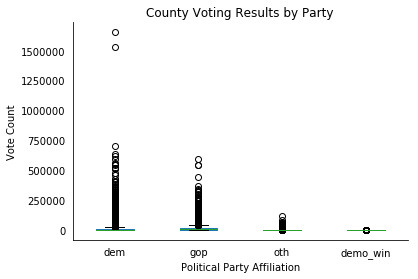

In [42]:
fig = plt.figure()
ax = df_results_2016.loc[:,'dem':].boxplot()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

ax.set_title('County Voting Results by Party')
ax.set_xlabel('Political Party Affiliation')
ax.set_ylabel('Vote Count')

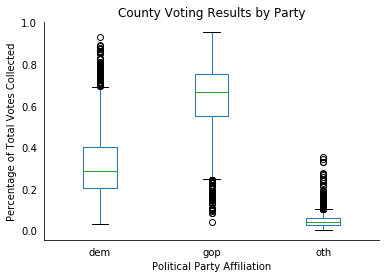

In [47]:
with PdfPages('county_results_by_party.pdf') as pdf:
    
    fig = plt.figure()
    ax = df_results_2016.loc[:,'dem':'oth'].div(df_results_2016['total'], axis=0).plot.box()

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(False)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')

    ax.set_title('County Voting Results by Party')
    ax.set_xlabel('Political Party Affiliation')
    ax.set_ylabel('Percentage of Total Votes Collected')
    
    # Save the figure to the file
    pdf.savefig()

Note: There are some data points that are above one in the non-2016 election results. These points shouldn't exist.

Question: Do democrats tend to win larger counties and republicans win the smaller (population-wise) counties, but more of them? 

Question: Do democrats tend to win more densely populated counties?

In [20]:
df_results_2016['demo_win'] = df_results_2016['dem'] > df_results_2016['gop']

/Users/scott/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
df_results_2016.head(10)

,fips_code,county,Year,total,dem,gop,oth,demo_win
2,1001,Autauga County,2016,24661,5908,18110,643,False
5,1003,Baldwin County,2016,94090,18409,72780,2901,False
8,1005,Barbour County,2016,10390,4848,5431,111,False
11,1007,Bibb County,2016,8748,1874,6733,141,False
14,1009,Blount County,2016,25384,2150,22808,426,False
17,1011,Bullock County,2016,4701,3530,1139,32,True
20,1013,Butler County,2016,8685,3716,4891,78,False
23,1015,Calhoun County,2016,47376,13197,32803,1376,False
26,1017,Chambers County,2016,13778,5763,7803,212,False
29,1019,Cherokee County,2016,10503,1524,8809,170,False


In [26]:
county_win_count = df_results_2016.groupby('demo_win').size()
county_win_count

demo_win
False    2625
True      487
dtype: int64

In [27]:
county_win_median = df_results_2016.groupby('demo_win')['total'].median()
county_win_median

demo_win
False     9684
True     42523
Name: total, dtype: int64

In [28]:
county_win_total = df_results_2016.groupby('demo_win')['total'].sum()
county_win_total

demo_win
False    61286285
True     65983042
Name: total, dtype: int64

Question: What are the fields in this df_results dataframe? Do the counts refer to votes collected? Confirm this information.

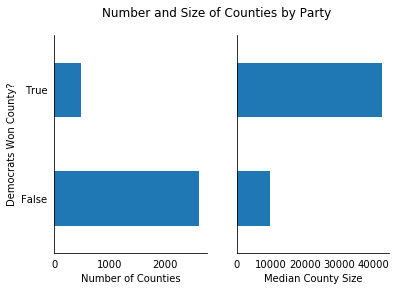

In [39]:
with PdfPages('size_num_counties_by_party.pdf') as pdf:
    
    f, ax = plt.subplots(1,2, sharey=True)

    f.suptitle('Number and Size of Counties by Party')

    county_win_count.plot(kind='barh',ax=ax[0])
    county_win_median.plot(kind='barh',ax=ax[1])

    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].yaxis.set_ticks_position('none')
    ax[0].xaxis.set_ticks_position('none')
    ax[0].set_xlabel('Number of Counties')
    ax[0].set_ylabel('Democrats Won County?')

    ax[1].spines['right'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    ax[1].yaxis.set_ticks_position('none')
    ax[1].xaxis.set_ticks_position('none')
    ax[1].set_xlabel('Median County Size')
    ax[1].set_ylabel('Democrats Won County?')
    
    # Save the figure to the file
    pdf.savefig()

##########

In [ ]:
df_results.select_dtypes(include=[np.number])